In [ ]:
import numpy as np
from scipy.special import ellipk, ellipe, elliprf, elliprj
import matplotlib.pyplot as plt



### CS Optimisation
06/03/25

127462.12377065387 0.3885585585585586 160.2303334262097


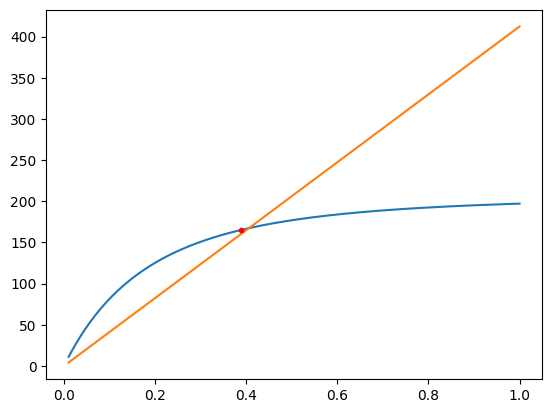

In [ ]:
def ellippi(n, m):
  return elliprf(                                                                                                                                                                                        
        0., 1. - m, 1.) + (n / 3.) * elliprj(0., 1. - m, 1., 1. - n)

a = 0.3
r = 0.08
l = np.linspace(0.01, 1, 1000)

n = 4 * a * r/(r + a)**2
m = 4 * r * a/((r + a)**2 + l**2/4)

k = (1/m * (ellipk(m) - ellipe(m)) + (1-n)/n * (ellipk(m) - ellippi(n,m))) * l * np.sqrt(a * r * m)/(np.pi * r**2)

DIDT = []
NN = []
L = []
V = 0.12

vmax = 500
imax = 1e3
R = 3.3e-3
mu = 4e-7 * np.pi

N = vmax/(2 * np.pi) * 1/(R * r * imax + V/k)
didt = 2 * V * l/(mu * r**2 * N * k)
idx = np.argmin(didt)

plt.plot(l, N)
plt.plot(l, l/4.85e-3 * 2)
plt.plot(l[idx], N[idx], 'r.')

print(didt[idx], l[idx], l[idx]/4.85e-3 * 2)

### Representative coil profiles for Rocoil quote + fft
09/03/25

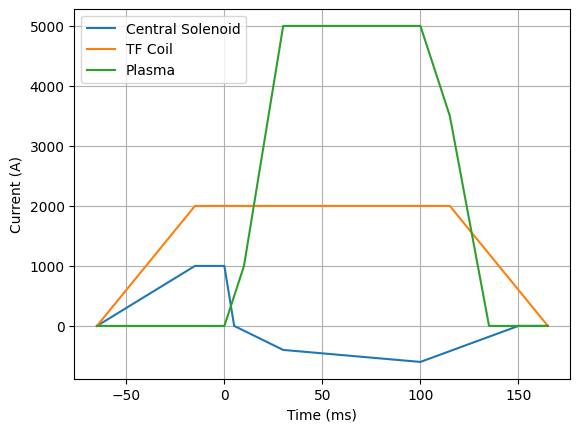

In [358]:
x_CS = np.array([-0.065, -0.015, 0, 0.005, 0.03, 0.1, 0.15, 0.165]) * 1e3
y_CS = [0, 1000, 1000, 0, -400, -600, 0, 0]

x_TF = np.array([-0.065, -0.015, 0.115, 0.165]) * 1e3
y_TF = [0, 2000, 2000, 0]

x_P = np.array([-0.065, 0, 0.01, 0.03, 0.1, 0.115, 0.135, 0.165]) * 1e3
y_P = [0, 0, 1000, 5000, 5000, 3500, 0, 0]

plt.plot(x_CS, y_CS, label='Central Solenoid')
plt.plot(x_TF, y_TF, label='TF Coil')
plt.plot(x_P, y_P, label='Plasma')
plt.xlabel('Time (ms)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid()
plt.show()

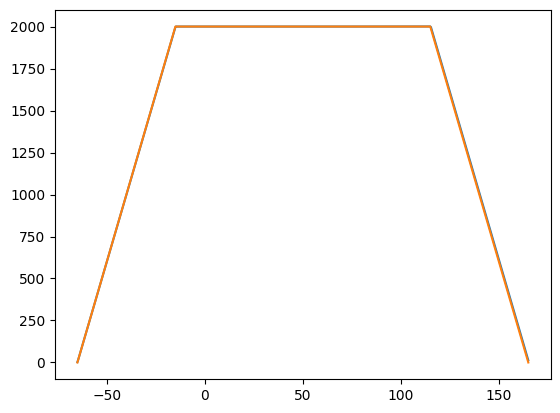

In [357]:
N = 14

x, y = x_TF, y_TF

t = np.linspace(x[0], x[-1], 2**N)
i = np.interp(t, x, y)

freq = np.fft.fftfreq(2**N, d=x[-1]/2**N)
sp = np.fft.fft(i)

#plt.plot(freq, np.log(np.abs(sp)), '.')

sp_clip = sp[np.abs(freq) < 2]
sp_clip *= (len(sp_clip)/2**N)

y_new = np.fft.ifft(sp_clip)
t_new = np.linspace(x[0], x[-1], len(y_new))

plt.plot(t_new, y_new.real)
plt.plot(x, y)

### TF Inductance and Resistance

$$
L=\frac{1}{2} \mu_0 r_0 k^2 [I_0(k) + 2I_1(k) + I_2(k)]
$$

In [397]:
r1 = 0.12 #0.12
r2 = 0.55 #0.55
N = 80 #80
r0 = np.sqrt(r1 * r2)
k = 1/2 * np.log(r2/r1)

from scipy.special import iv
from scipy.constants import mu_0

L = mu_0/2 * r0 * k**2 * (iv(0, k) + 2*iv(1, k) + iv(2, k)) * N
l = 2 * np.pi * r0 * k * (iv(0, k) + iv(1, k)) * N
R = l * 554e-6

print(L, R, l)

1.5293612471815944e-05 0.08490150750773215 153.2518186060147
